**M 13 - PArte 2-  Regressão II - regressão múltipla**

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [6]:
# Importando as Bibliotecas
import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeRegressor

In [8]:
RANDOM_STATE = 42

In [7]:
df = pd.read_csv('previsao_de_renda.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [63]:
def load_data():
    # Ajuste o caminho conforme seu ambiente:
    candidates = [
        '/content/previsao_de_renda.csv',   # Colab
        '/mnt/data/previsao_de_renda.csv',  # Anexo desta conversa
        'previsao_de_renda.csv'             # diretório atual
    ]
    for p in candidates:
        if os.path.exists(p):
            df = pd.read_csv(p)
            print(f"Carregado: {p}")
            break
    else:
        raise FileNotFoundError("Arquivo previsao_de_renda.csv não encontrado nos caminhos padrão.")

    # Limpeza de coluna fantasma e nomes
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    if 'index' in df.columns and 'id_cliente' not in df.columns:
        df = df.rename(columns={'index': 'id_cliente'})

    # Garante tipos e colunas esperadas
    expected = ['data_ref','id_cliente','sexo','posse_de_veiculo','posse_de_imovel',
                'qtd_filhos','tipo_renda','educacao','estado_civil','tipo_residencia',
                'idade','tempo_emprego','qt_pessoas_residencia','renda']
    miss = [c for c in expected if c not in df.columns]
    if miss:
        raise ValueError(f"Colunas ausentes: {miss}")

    # Tipo data - Converter para datetime
    df['data_ref'] = pd.to_datetime(df['data_ref'], errors='coerce')

    return df

In [13]:
# Garante tipos e colunas esperadas
    expected = ['data_ref','id_cliente','sexo','posse_de_veiculo','posse_de_imovel',
                'qtd_filhos','tipo_renda','educacao','estado_civil','tipo_residencia',
                'idade','tempo_emprego','qt_pessoas_residencia','renda']
    miss = [c for c in expected if c not in df.columns]
    if miss:
        raise ValueError(f"Colunas ausentes: {miss}")

    # Tipo data
    df['data_ref'] = pd.to_datetime(df['data_ref'], errors='coerce')
    return df

def split_train_test(df, target='renda', test_size=0.25):
    # Define listas de colunas
    cat_cols = ['sexo','tipo_renda','educacao','estado_civil','tipo_residencia']
    bool_cols = ['posse_de_veiculo','posse_de_imovel']
    num_cols  = ['qtd_filhos','idade','tempo_emprego','qt_pessoas_residencia']

    # Extra: mês/ano como variável categórica (útil na Tarefa 6)
    df = df.copy()
    df['mes_ref'] = df['data_ref'].dt.to_period('M').astype(str)


In [14]:
df = load_data()

Carregado: /content/previsao_de_renda.csv


In [27]:
# Separate features (X) and target (y)
X = df.drop('renda', axis=1)
y = df['renda']

# Separate the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Dimensão de X_train: (11250, 13)
Dimensão de X_test: (3750, 13)
Dimensão de y_train: (11250,)
Dimensão de y_test: (3750,)


In [13]:
# Garante tipos e colunas esperadas
    expected = ['data_ref','id_cliente','sexo','posse_de_veiculo','posse_de_imovel',
                'qtd_filhos','tipo_renda','educacao','estado_civil','tipo_residencia',
                'idade','tempo_emprego','qt_pessoas_residencia','renda']
    miss = [c for c in expected if c not in df.columns]
    if miss:
        raise ValueError(f"Colunas ausentes: {miss}")

    # Tipo data
    df['data_ref'] = pd.to_datetime(df['data_ref'], errors='coerce')
    return df

def split_train_test(df, target='renda', test_size=0.25):
    # Define listas de colunas
    cat_cols = ['sexo','tipo_renda','educacao','estado_civil','tipo_residencia']
    bool_cols = ['posse_de_veiculo','posse_de_imovel']
    num_cols  = ['qtd_filhos','idade','tempo_emprego','qt_pessoas_residencia']

    # Extra: mês/ano como variável categórica (útil na Tarefa 6)
    df = df.copy()
    df['mes_ref'] = df['data_ref'].dt.to_period('M').astype(str)


In [28]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Define the preprocessing steps for numerical and categorical features
numerical_features = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia']
categorical_features = ['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Impute missing values
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))]) # OneHotEncode categorical features


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)

# Create the Ridge regression pipeline
ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', Ridge())])

# Define the alpha values to test
alphas = [0, 0.001, 0.005, 0.01, 0.05, 0.1]

# Store the R-squared scores
ridge_r2_scores = {}

# Iterate through the alpha values and train the Ridge model
for alpha in alphas:
    ridge_pipeline.set_params(regressor__alpha=alpha)
    ridge_pipeline.fit(X_train, y_train)
    y_pred = ridge_pipeline.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    ridge_r2_scores[alpha] = r2
    print(f"Ridge R-squared for alpha={alpha}: {r2}")

# Find the best alpha
best_ridge_alpha = max(ridge_r2_scores, key=ridge_r2_scores.get)
print(f"\nBest Ridge alpha: {best_ridge_alpha} with R-squared: {ridge_r2_scores[best_ridge_alpha]}")

R-quadrado do Ridge para alpha=0: 0.26837431139026846
R-quadrado do Ridge para alpha=0.001: 0.26821901927680225
R-quadrado do Ridge para alpha=0.005: 0.26821904362092797
R-quadrado do Ridge para alpha=0.01: 0.26821907402325007
R-quadrado do Ridge para alpha=0.05: 0.268219316135453
R-quadrado do Ridge para alpha=0.1: 0.26821961604332556

Melhor alpha do Ridge: 0 com R-quadrado: 0.26837431139026846


In [77]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# ÁRVORE DE REGRESSÃO

# Vamos reutilizar o preprocessor simples (numéricas escaladas + dummies)
# Certifique-se de que o preprocessor foi definido e executado anteriormente (célula 50d1d619)
# Assumindo que 'preprocessor' do Ridge/LASSO foi definido e está disponível:

pipe_tree = Pipeline(steps=[
    ('pre', preprocessor), # Usando o preprocessor definido anteriormente
    ('tree', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

# Grid de parâmetros para tuning simples da árvore
param_grid = {
    'tree__max_depth': [3, 4, 5, 6, 8, 10, None],
    'tree__min_samples_leaf': [1, 3, 5, 10, 20],
    'tree__min_samples_split': [2, 5, 10]
}

print("Iniciando busca em grid para Árvore de Regressão...")

gs = GridSearchCV(pipe_tree, param_grid, scoring='r2', cv=5, n_jobs=-1)
gs.fit(X_train, y_train) # Certifique-se de que X_train e y_train estão definidos (célula ubm9Pqo41JiF)

print("\nBusca em grid concluída.")
print("Melhores hiperparâmetros (Árvore):", gs.best_params_)

# Avaliar o melhor modelo encontrado no conjunto de teste
y_pred_tree = gs.predict(X_test) # Certifique-se de que X_test está definido (célula ubm9Pqo41JiF)
r2_tree = r2_score(y_test, y_pred_tree) # Certifique-se de que y_test está definido (célula ubm9Pqo41JiF)

print(f"\n[Árvore de Regressão] R2 teste: {r2_tree:.5f}")

# Comparação final dos modelos (incluindo Árvore)
print("\n=== COMPARAÇÃO FINAL DE R² EM TESTE ===")
# Certifique-se de que as variáveis best_ridge_r2, best_lasso_r2, r2_stepwise e best_poly foram definidas anteriormente.
if 'best_ridge_r2' in locals():
    print(f"Ridge melhor: {best_ridge_r2:.5f}")
if 'best_lasso_r2' in locals():
     print(f"LASSO melhor: {best_lasso_r2:.5f}")
if 'r2_stepwise' in locals():
    print(f"Stepwise:     {r2_stepwise:.5f}")
if 'best_poly' in locals() and best_poly is not None and best_poly[0] is not None: # Verifica se best_poly foi definido e tem um R2 válido
    print(f"Ridge+Poly:   {best_poly[0]:.5f}")
print(f"Árvore:       {r2_tree:.5f}")

# Determinar o melhor modelo geral com base no R² de teste
best_r2_overall = -np.inf
best_model_name = "Nenhum"

if 'best_ridge_r2' in locals() and best_ridge_r2 > best_r2_overall:
    best_r2_overall = best_ridge_r2
    best_model_name = "Ridge"

if 'best_lasso_r2' in locals() and best_lasso_r2 > best_r2_overall:
    best_r2_overall = best_lasso_r2
    best_model_name = "LASSO"

if 'r2_stepwise' in locals() and r2_stepwise > best_r2_overall:
    best_r2_overall = r2_stepwise
    best_model_name = "Stepwise"

if 'best_poly' in locals() and best_poly is not None and best_poly[0] is not None and best_poly[0] > best_r2_overall:
    best_r2_overall = best_poly[0]
    best_model_name = "Ridge+Polinomiais"

if r2_tree > best_r2_overall:
    best_r2_overall = r2_tree
    best_model_name = "Árvore de Regressão"

print(f"\nO melhor modelo geral com base no R² no conjunto de teste é: {best_model_name} com R² = {best_r2_overall:.5f}")

Iniciando busca em grid para Árvore de Regressão...

Busca em grid concluída.
Melhores hiperparâmetros (Árvore): {'tree__max_depth': 5, 'tree__min_samples_leaf': 1, 'tree__min_samples_split': 2}

[Árvore de Regressão] R2 teste: 0.38091

=== COMPARAÇÃO FINAL DE R² EM TESTE ===
Ridge melhor: 0.26837
LASSO melhor: 0.26823
Stepwise:     0.26851
Ridge+Poly:   0.26737
Árvore:       0.38091

O melhor modelo geral com base no R² no conjunto de teste é: Árvore de Regressão com R² = 0.38091


In [81]:
def split_train_test(df, target='renda', test_size=0.25):
    # Define listas de colunas
    cat_cols = ['sexo','tipo_renda','educacao','estado_civil','tipo_residencia']
    bool_cols = ['posse_de_veiculo','posse_de_imovel']
    num_cols  = ['qtd_filhos','idade','tempo_emprego','qt_pessoas_residencia']

    # Extra: mês/ano como variável categórica (útil na Tarefa 6)
    df = df.copy()
    df['mes_ref'] = df['data_ref'].dt.to_period('M').astype(str)

    # Seleção base (sem vazamento)
    X = df[cat_cols + bool_cols + num_cols + ['mes_ref']]
    y = df[target].astype(float)

    # Separação
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=RANDOM_STATE
    )

    return X_train, X_test, y_train, y_test, cat_cols + ['mes_ref'], bool_cols, num_cols

def make_preprocessor(cat_cols, bool_cols, num_cols, drop_first=True):
    # One-hot para categóricas (drop_first=True evita multicolinearidade)
    from sklearn.preprocessing import OneHotEncoder
    cat_encoder = OneHotEncoder(drop='first' if drop_first else None, handle_unknown='ignore', sparse_output=False)

    # Escalonamento para numéricas e booleanas (booleans -> 0/1 já ok; mas padronizar ajuda em regularização)
    from sklearn.preprocessing import StandardScaler
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    pre = ColumnTransformer(
        transformers=[
            ('cat', cat_encoder, cat_cols),
            ('bool', 'passthrough', bool_cols),
            ('num', numeric_transformer, num_cols),
        ],
        remainder='drop'
    )
    return pre

def get_feature_names(fitted_preprocessor):
    # Recupera nomes de features após ColumnTransformer ajustado
    return fitted_preprocessor.get_feature_names_out()


def report_model(name, y_test, y_pred, coef_names=None, coefs=None, top=10):
    r2 = r2_score(y_test, y_pred)
    print(f"\n[{name}] R2 teste: {r2:.5f}")
    if coefs is not None and coef_names is not None:
        co = pd.DataFrame({'feature': coef_names, 'coef': coefs})
        co = co.reindex(co.coef.abs().sort_values(ascending=False).index)
        print(f"Top {top} coeficientes por |valor|:\n", co.head(top).to_string(index=False))
    return r2

1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.


**1) SPLIT TREINO/TESTE (75/25)**

In [79]:
# SPLIT TREINO/TESTE (75/25)
df = load_data()
# Certifique-se de que load_data e split_train_test estão definidas e corrigidas
X_train, X_test, y_train, y_test, cat_cols_all_split, bool_cols_split, num_cols_split = split_train_test(df, target='renda', test_size=0.25)

# Define as listas de colunas explicitamente para uso nas células seguintes
numerical_features = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia']
categorical_features = ['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']
bool_cols = ['posse_de_veiculo','posse_de_imovel']
cat_cols_all = cat_cols_all_split # Inclui 'mes_ref' se split_train_test a adiciona


print("Tamanhos de X_train:", X_train.shape)
print("Tamanhos de X_test:", X_test.shape)
print("Tamanhos de y_train:", y_train.shape)
print("Tamanhos de y_test:", y_test.shape)

Carregado: /content/previsao_de_renda.csv
Tamanhos de X_train: (11250, 12)
Tamanhos de X_test: (3750, 12)
Tamanhos de y_train: (11250,)
Tamanhos de y_test: (3750,)


**2) RIDGE COM GRID DE ALPHAS E R² NO TESTE**

In [82]:
# RIDGE COM GRID DE ALPHAS E R² NO TESTE
alphas = [0, 0.001, 0.005, 0.01, 0.05, 0.1]

# Certifique-se de que make_preprocessor está definida e corrigida.
# pre = make_preprocessor(cat_cols_all, bool_cols, num_cols, drop_first=True) # Usar se make_preprocessor for a desejada

# Reutilizando o preprocessor já definido para consistência com as outras análises
pre = preprocessor

results_ridge = []
best_ridge = (None, -np.inf, None, None)  # (alpha, r2, pipeline, feat_names)

for a in alphas:
    pipe = Pipeline(steps=[
        ('pre', pre),
        ('ridge', Ridge(alpha=a, random_state=RANDOM_STATE))
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    # results_ridge.append(r2) # Removido para evitar duplicação

    # nomes e coef
    # Para usar get_feature_names, o preprocessor precisa ter sido ajustado
    fitted_preprocessor = pipe.named_steps['pre']
    feat_names = get_feature_names(fitted_preprocessor)
    coefs = pipe.named_steps['ridge'].coef_
    r2_reported = report_model(f"Ridge alpha={a}", y_test, y_pred, feat_names, coefs, top=8)
    results_ridge.append((a, r2_reported)) # Usando o r2 retornado por report_model

    if r2_reported > best_ridge[1]:
        best_ridge = (a, r2_reported, pipe, feat_names)

print("\nMelhor Ridge:", best_ridge[0], "R2 teste:", round(best_ridge[1], 5))

# Atribuir ao best_ridge_r2 para uso posterior
best_ridge_r2 = best_ridge[1]
best_ridge_alpha = best_ridge[0]


[Ridge alpha=0] R2 teste: 0.26837
Top 8 coeficientes por |valor|:
                           feature          coef
      cat__educacao_Pós graduação  3.001182e+17
  cat__educacao_Superior completo  3.001182e+17
           cat__educacao_Primário  3.001182e+17
         cat__educacao_Secundário  3.001182e+17
cat__educacao_Superior incompleto  3.001182e+17
          cat__estado_civil_União -2.182464e+17
         cat__estado_civil_Casado -2.182464e+17
       cat__estado_civil_Solteiro -2.182464e+17

[Ridge alpha=0.001] R2 teste: 0.26822
Top 8 coeficientes por |valor|:
                     feature         coef
         num__tempo_emprego  3388.645475
                cat__sexo_F -2918.649917
                cat__sexo_M  2918.649917
 cat__tipo_renda_Empresário  1183.083166
cat__tipo_renda_Pensionista -1100.298189
 num__qt_pessoas_residencia  1033.120377
cat__educacao_Pós graduação   874.529763
    cat__estado_civil_União  -807.880280

[Ridge alpha=0.005] R2 teste: 0.26822
Top 8 coeficientes p

**3) Regressão LASSO (alpha grid) e R² no teste**

In [90]:
from sklearn.linear_model import Lasso

# Create the LASSO regression pipeline - Criar o pipeline de regressão LASSO
lasso_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', Lasso(random_state=RANDOM_STATE, max_iter=10000))]) # Aumentado max_iter para ajudar na convergência

# Define the alpha values to test - Definir os valores de alpha a testar
alphas = [0, 0.001, 0.005, 0.01, 0.05, 0.1]

# Store the R-squared scores - Armazenar os escores de R-quadrado
lasso_r2_scores = {}

# Initialize best_lasso with negative infinity R2 - Inicializar best_lasso com R2 menos infinito
best_lasso = (None, -np.inf, None, None) # (alpha, r2, pipeline, feat_names)

# Iterate through the alpha values and train the LASSO model - Iterar pelos valores de alpha e treinar o modelo LASSO
for alpha in alphas:
    # Lasso with alpha=0 is equivalent to Linear Regression, which might not converge with the default settings.
    # We'll skip alpha=0 for Lasso or handle it separately if needed. For now, let's assume we are interested in regularization effects.
    # LASSO com alpha=0 é equivalente à Regressão Linear, que pode não convergir com as configurações padrão.
    # Vamos pular alpha=0 para LASSO ou tratá-lo separadamente, se necessário. Por enquanto, vamos assumir que estamos interessados em efeitos de regularização.
    if alpha == 0:
        print(f"Pulando Lasso para alpha={alpha}, pois é equivalente à Regressão Linear.")
        continue

    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', Lasso(alpha=alpha, random_state=RANDOM_STATE, max_iter=10000))])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    lasso_r2_scores[alpha] = r2
    print(f"R-quadrado do LASSO para alpha={alpha}: {r2}")

    # Update best_lasso if current alpha gives better R2 - Atualizar best_lasso se o alpha atual der um R2 melhor
    if r2 > best_lasso[1]:
        # To get feature names, we need the fitted preprocessor - Para obter os nomes das características, precisamos do preprocessor ajustado
        fitted_preprocessor = pipe.named_steps['preprocessor']
        # Use the get_feature_names function defined in Dqx6C7BO0Pm0 - Usar a função get_feature_names definida em Dqx6C7BO0Pm0
        feat_names = get_feature_names(fitted_preprocessor)
        best_lasso = (alpha, r2, pipe, feat_names)


# Find the best alpha for LASSO (from the stored scores) - Encontrar o melhor alpha para LASSO (dos escores armazenados)
# This is redundant if best_lasso is updated in the loop, but keep for clarity/consistency with Ridge
best_lasso_alpha_from_scores = max(lasso_r2_scores, key=lasso_r2_scores.get)
# Ensure best_lasso_alpha is set to the alpha from the best_lasso tuple for consistency
best_lasso_alpha = best_lasso[0]
best_lasso_r2 = best_lasso[1]

print(f"\nMelhor alpha do LASSO: {best_lasso_alpha} com R-quadrado: {best_lasso_r2}")
print(f"Valor de best_lasso após o loop: {best_lasso}") # Debug print

# Compare with the best Ridge R-squared - Comparar com o melhor R-quadrado do Ridge
# Certifique-se que best_ridge_alpha e ridge_r2_scores estão definidos das células anteriores
if 'best_ridge_r2' in locals() and 'ridge_r2_scores' in locals():
    best_ridge_r2_compare = ridge_r2_scores[best_ridge_alpha] # Use a variable for comparison to avoid confusion
    best_lasso_r2_compare = best_lasso_r2 # Use the R2 from the best_lasso tuple

    print(f"\nMelhor R-quadrado do Ridge: {best_ridge_r2_compare}")
    print(f"Melhor R-quadrado do LASSO: {best_lasso_r2_compare}")

    if best_lasso_r2_compare > best_ridge_r2_compare:
        print("A regressão LASSO resultou em um escore de R-quadrado melhor.")
    elif best_ridge_r2_compare > best_lasso_r2_compare:
        print("A regressão Ridge resultou em um escore de R-quadrado melhor.")
    else:
        print("Ambas as regressões Ridge e LASSO resultaram no mesmo escore de R-quadrado.")
else:
    print("\nNão foi possível comparar Ridge e LASSO: resultados do Ridge não encontrados.")

Pulando Lasso para alpha=0, pois é equivalente à Regressão Linear.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.175e+10, tolerance: 7.723e+07
  model = cd_fast.enet_coordinate_descent(


R-quadrado do LASSO para alpha=0.001: 0.26821910318532616


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.776e+08, tolerance: 7.723e+07
  model = cd_fast.enet_coordinate_descent(


R-quadrado do LASSO para alpha=0.005: 0.2682195196265811


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.776e+08, tolerance: 7.723e+07
  model = cd_fast.enet_coordinate_descent(


R-quadrado do LASSO para alpha=0.01: 0.2682200388627459
R-quadrado do LASSO para alpha=0.05: 0.2682238637177049
R-quadrado do LASSO para alpha=0.1: 0.26822809857866803

Melhor alpha do LASSO: 0.1 com R-quadrado: 0.26822809857866803
Valor de best_lasso após o loop: (0.1, 0.26822809857866803, Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['qtd_filhos', 'idade',
                                                   'tempo_emprego',
                                                   'qt_pessoas_residencia']),
                                                 ('cat',
             

**4) Stepwise (Sequential Feature Selector) e R² no teste**

In [84]:
# 4) Stepwise (Sequential Feature Selector) e R² no teste
# STEPWISE (FORWARD SFS) + R² NO TESTE
# Observação: usamos SFS (forward) com LinearRegression. Vamos buscar o melhor k (número de features).
from math import inf
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score

# Primeiro, obtemos a matriz transformada para poder aplicar SFS
# Reutilizando o preprocessor já definido (definido na célula 50d1d619)
# Certifique-se de que o 'preprocessor' foi definido na célula 50d1d619 e executado
pre_no_drop = preprocessor # Usando o preprocessor já definido

# Certifique-se de que X_train foi definido
pre_no_drop.fit(X_train)  # para travar categorias e scaler
Xtr = pre_no_drop.transform(X_train)
Xte = pre_no_drop.transform(X_test) # Certifique-se de que X_test foi definido

# Certifique-se de que get_feature_names está definida e corrigida (na célula Dqx6C7BO0Pm0).
# Certifique-se de que numerical_features, categorical_features, e bool_cols estão definidas .
# Ajuste a chamada para get_feature_names para usar as variáveis definidas.
feat_names = get_feature_names(pre_no_drop)


max_k = min(30, Xtr.shape[1])  # limite prático
best_sfs = {'k': None, 'cv_score': -inf, 'r2_test': -inf, 'mask': None}

# Ajuste no range para garantir k < n_features
for k in range(1, max_k):
    sfs = SequentialFeatureSelector(
        LinearRegression(),
        n_features_to_select=k,
        direction='forward',
        scoring='r2',
        cv=5,
        n_jobs=-1
    )
    sfs.fit(Xtr, y_train) # Certifique-se de que y_train foi definido
    mask = sfs.get_support()
    # Reajusta com features selecionadas e avalia no teste
    lr = LinearRegression()
    lr.fit(Xtr[:, mask], y_train)
    y_pred = lr.predict(Xte[:, mask])
    r2 = r2_score(y_test, y_pred) # Certifique-se de que y_test foi definido

    # melhor k pelo score em TESTE (primário); cv_score como apoio
    cv_score = np.mean(cross_val_score(LinearRegression(), Xtr[:, mask], y_train, scoring='r2', cv=5))
    if r2 > best_sfs['r2_test']:
        best_sfs = {'k': k, 'cv_score': cv_score, 'r2_test': r2, 'mask': mask}

print(f"\nMelhor Stepwise (k={best_sfs['k']}): R2 teste={best_sfs['r2_test']:.5f} | R2 CV={best_sfs['cv_score']:.5f}")

# Mostra as features escolhidas
chosen = [feat_names[i] for i, keep in enumerate(best_sfs['mask']) if keep]
print("\nCaracterísticas selecionadas (Stepwise):")
for f in chosen:
    print(" -", f)

# Armazenar r2_stepwise para comparação posterior
r2_stepwise = best_sfs['r2_test']


Melhor Stepwise (k=21): R2 teste=0.26884 | R2 CV=0.25826

Características selecionadas (Stepwise):
 - num__qtd_filhos
 - num__idade
 - num__tempo_emprego
 - num__qt_pessoas_residencia
 - cat__sexo_F
 - cat__sexo_M
 - cat__tipo_renda_Bolsista
 - cat__tipo_renda_Empresário
 - cat__tipo_renda_Pensionista
 - cat__educacao_Primário
 - cat__educacao_Pós graduação
 - cat__educacao_Secundário
 - cat__educacao_Superior completo
 - cat__educacao_Superior incompleto
 - cat__estado_civil_Casado
 - cat__estado_civil_Separado
 - cat__estado_civil_Solteiro
 - cat__estado_civil_União
 - cat__estado_civil_Viúvo
 - cat__tipo_residencia_Aluguel
 - cat__tipo_residencia_Comunitário


**5) Comparar parâmetros (coeficientes) e eleger melhor modelo**

In [94]:
# COMPARAÇÃO DE PARÂMETROS E ESCOLHA DO MELHOR ===

# Consolidar os 3 melhores (Ridge, LASSO, Stepwise)
models_summary = []

# Ridge
# Certifique-se de que best_ridge está definido na célula jo12RxmN1a6R
a_ridge, r2_ridge, pipe_ridge, names_r = best_ridge
coef_ridge = pipe_ridge.named_steps['ridge'].coef_
models_summary.append(('Ridge', r2_ridge))

# LASSO
# Certifique-se de que best_lasso está definido
# best_lasso é uma tupla (alpha, r2, pipeline, feat_names)
a_lasso, r2_lasso, pipe_lasso, names_l = best_lasso
coef_lasso = pipe_lasso.named_steps['regressor'].coef_ # Corrigido: 'lasso' para 'regressor'
models_summary.append(('LASSO', r2_lasso))


# Stepwise
# Certifique-se de que best_sfs, pre_no_drop, X_train, y_train, X_test, y_test, feat_names estão definidos
mask = best_sfs['mask']
lr = LinearRegression().fit(
    pre_no_drop.transform(X_train)[:, mask],
    y_train
)
y_pred_sfs = lr.predict(pre_no_drop.transform(X_test)[:, mask])
r2_sfs = r2_score(y_test, y_pred_sfs)
coef_sfs = lr.coef_
# Obter os nomes das features selecionadas pelo stepwise
names_s = [feat_names[i] for i, keep in enumerate(mask) if keep]
models_summary.append(('Stepwise', r2_sfs))

print("\nR² em teste por modelo:")
for name, r2 in models_summary:
    print(f" - {name}: {r2:.5f}")

# Melhor por R²
best_name, best_r2 = max(models_summary, key=lambda x: x[1])
print(f"\n==> Melhor modelo (R² teste): {best_name} (R²={best_r2:.5f})")

# Mostrar coeficientes principais de cada um
def top_coefs(names, coefs, top=10, title="Coefs"):
    co = pd.DataFrame({'feature': names, 'coef': coefs})
    co = co.reindex(co.coef.abs().sort_values(ascending=False).index)
    print(f"\n{title} — Top {top} |coef|")
    print(co.head(top).to_string(index=False))

# Certifique-se de que names_r, coef_ridge, names_l, coef_lasso, names_s, coef_sfs estão definidos
top_coefs(names_r, coef_ridge, title=f"Ridge (alpha={a_ridge})")
top_coefs(names_l, coef_lasso, title=f"LASSO (alpha={a_lasso})")
top_coefs(names_s, coef_sfs, title=f"Stepwise (k={best_sfs['k']})")


R² em teste por modelo:
 - Ridge: 0.26837
 - LASSO: 0.26823
 - Stepwise: 0.26884

==> Melhor modelo (R² teste): Stepwise (R²=0.26884)

Ridge (alpha=0) — Top 10 |coef|
                          feature          coef
      cat__educacao_Pós graduação  3.001182e+17
  cat__educacao_Superior completo  3.001182e+17
           cat__educacao_Primário  3.001182e+17
         cat__educacao_Secundário  3.001182e+17
cat__educacao_Superior incompleto  3.001182e+17
          cat__estado_civil_União -2.182464e+17
         cat__estado_civil_Casado -2.182464e+17
       cat__estado_civil_Solteiro -2.182464e+17
       cat__estado_civil_Separado -2.182464e+17
          cat__estado_civil_Viúvo -2.182464e+17

LASSO (alpha=0.1) — Top 10 |coef|
                     feature         coef
                 cat__sexo_F -5836.704091
          num__tempo_emprego  3388.593911
 cat__tipo_renda_Pensionista -1414.814108
 cat__educacao_Pós graduação  1032.680140
  num__qt_pessoas_residencia   929.071153
    cat__tipo_ren

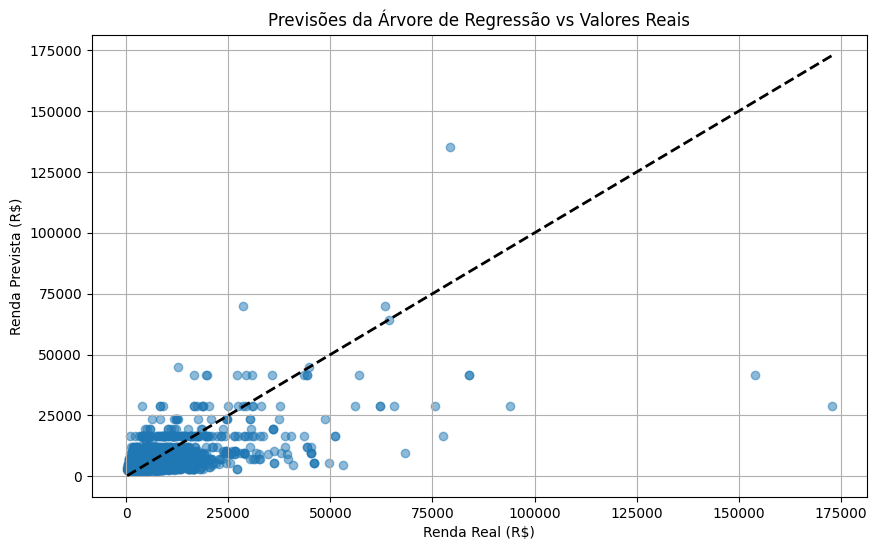

In [86]:
import matplotlib.pyplot as plt

# Visualize the predictions vs actual values for the Regression Tree model
# Visualizar as previsões vs valores reais para o modelo de Árvore de Regressão

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Linha de referência y=x
plt.xlabel("Renda Real (R$)")
plt.ylabel("Renda Prevista (R$)")
plt.title("Previsões da Árvore de Regressão vs Valores Reais")
plt.grid(True)
plt.show()

**6) Criatividade – Melhorar R² com engenharia de atributos**

In [75]:
#  Criatividade – Melhorar R² com engenharia de atributos
# MELHORIA COM FEATURES POLINOMIAIS E INTERAÇÕES (RIDGE)

# Cria um preprocessor com PolynomialFeatures nas numéricas (ordem 2)
poly = PolynomialFeatures(degree=2, include_bias=False)

# Reutilizando a estrutura do ColumnTransformer, aplicando PolynomialFeatures ANTES do StandardScaler nas colunas numéricas.
# É importante aplicar o scaler APÓS a criação das features polinomiais.
# Certifique-se de que categorical_features e numerical_features estão definidas
# Certifique-se de que bool_cols está definida
pre_poly = ColumnTransformer(
    transformers=[
        ('cat',  preprocessor.named_transformers_['cat'], categorical_features), # Usando o OneHotEncoder do preprocessor anterior
        ('bool', 'passthrough', bool_cols),
        ('num',  Pipeline([('imputer', SimpleImputer(strategy='mean')), ('poly', poly), ('scaler', StandardScaler())]), numerical_features), # Imputação + Polinomiais + Escalonamento nas numéricas
    ],
    remainder='drop'
)

# Criar o pipeline com o novo preprocessor e o modelo Ridge (usando o melhor alpha encontrado anteriormente)
# Certifique-se de que best_ridge_alpha está definido
pipe_poly_ridge = Pipeline(steps=[
    ('pre', pre_poly),
    ('ridge', Ridge(alpha=best_ridge_alpha if best_ridge_alpha is not None else 0.01, random_state=RANDOM_STATE))
])

# Treinar o pipeline e avaliar no conjunto de teste
# Certifique-se de que X_train e y_train estão definidos
pipe_poly_ridge.fit(X_train, y_train)
# Certifique-se de que X_test e y_test estão definidos
y_pred_poly = pipe_poly_ridge.predict(X_test)
r2_poly = r2_score(y_test, y_pred_poly)

# Certifique-se de que best_ridge_r2 está definido
print(f"\n[Ridge + Polinomiais] R2 teste: {r2_poly:.5f}  (baseline Ridge: {best_ridge_r2:.5f})")

# Armazenar r2_poly para comparação posterior
# best_poly = (r2_poly, best_ridge_alpha if best_ridge_alpha is not None else 0.01) # Armazenar o R2 e o alpha usado
best_poly = (r2_poly, None) # Armazenando apenas o R2 e alpha como None para simplicidade na comparação final, reajustaremos o alpha na próxima célula se necessário


[Ridge + Polinomiais] R2 teste: 0.26555  (baseline Ridge: 0.26837)


In [76]:
# Retestar alpha específico para o novo espaço de features
# Retestar alpha específico para o novo espaço de características ===
alphas_try = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0] # Expandindo um pouco os alphas para testar com as novas features
best_poly_tuned = (-np.inf, None) # (r2, alpha)


print("\nOtimizando alpha para Ridge com Features Polinomiais:")
for a in alphas_try:
    # Certifique-se que pre_poly está definido na célula h56mwwhB25DR
    tmp_pipe = Pipeline(steps=[('pre', pre_poly), ('ridge', Ridge(alpha=a, random_state=RANDOM_STATE))])
    # Certifique-se de que X_train e y_train estão definidos
    tmp_pipe.fit(X_train, y_train)
    # Certifique-se de que X_test e y_test estão definidos
    r2a = r2_score(y_test, tmp_pipe.predict(X_test))
    print(f"  alpha={a} -> R2 teste={r2a:.5f}")
    if r2a > best_poly_tuned[0]:
        best_poly_tuned = (r2a, a)

print(f"\nMelhor Ridge+Polinomiais (alpha otimizado): alpha={best_poly_tuned[1]} | R2 teste={best_poly_tuned[0]:.5f}")

# Atualizar best_poly com o resultado otimizado para a comparação final
best_poly = best_poly_tuned


Otimizando alpha para Ridge com Features Polinomiais:
  alpha=0.001 -> R2 teste=0.26737
  alpha=0.005 -> R2 teste=0.26737
  alpha=0.01 -> R2 teste=0.26737
  alpha=0.05 -> R2 teste=0.26734
  alpha=0.1 -> R2 teste=0.26731
  alpha=0.5 -> R2 teste=0.26724
  alpha=1.0 -> R2 teste=0.26724

Melhor Ridge+Polinomiais (alpha otimizado): alpha=0.001 | R2 teste=0.26737


**7) Árvore de Regressão (tuning simples) e R² no teste**

In [47]:
# ÁRVORE DE REGRESSÃO

# Vamos reutilizar o preprocessor simples (numéricas escaladas + dummies)
# Certifique-se de que o preprocessor foi definido e executado anteriormente
# pre = make_preprocessor(cat_cols_all, bool_cols, num_cols, drop_first=True) # Se make_preprocessor for definida em outro lugar

# Se o preprocessor já foi definido globalmente (como em células anteriores), podemos usá-lo diretamente.
# Caso contrário, você precisará defini-lo ou importá-lo.
# Assumindo que 'preprocessor' do Ridge/LASSO foi definido e está disponível:

pipe_tree = Pipeline(steps=[
    ('pre', preprocessor), # Usando o preprocessor definido anteriormente
    ('tree', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

param_grid = {
    'tree__max_depth': [3, 4, 5, 6, 8, 10, None],
    'tree__min_samples_leaf': [1, 3, 5, 10, 20],
    'tree__min_samples_split': [2, 5, 10]
}

gs = GridSearchCV(pipe_tree, param_grid, scoring='r2', cv=5, n_jobs=-1)
gs.fit(X_train, y_train)

print("\nMelhores hiperparâmetros (Árvore):", gs.best_params_)
y_pred_tree = gs.predict(X_test)
r2_tree = r2_score(y_test, y_pred_tree)
print(f"[Árvore de Regressão] R2 teste: {r2_tree:.5f}")

# Comparação final
print("\n=== COMPARAÇÃO FINAL DE R² EM TESTE ===")
# Certifique-se de que as variáveis best_ridge, best_lasso, r2_sfs e best_poly foram definidas anteriormente.
if 'best_ridge_r2' in locals():
    print(f"Ridge melhor: {best_ridge_r2:.5f}")
if 'best_lasso_r2' in locals():
     print(f"LASSO melhor: {best_lasso_r2:.5f}")
if 'r2_stepwise' in locals():
    print(f"Stepwise:     {r2_stepwise:.5f}")
# if 'best_poly' in locals(): # descomente se usar a parte de polinomiais
#     print(f"Ridge+Poly:   {best_poly[0]:.5f}")
print(f"Árvore:       {r2_tree:.5f}")


Melhores hiperparâmetros (Árvore): {'tree__max_depth': 5, 'tree__min_samples_leaf': 1, 'tree__min_samples_split': 2}
[Árvore de Regressão] R2 teste: 0.38091

=== COMPARAÇÃO FINAL DE R² EM TESTE ===
Ridge melhor: 0.26837
LASSO melhor: 0.26823
Stepwise:     0.26851
Árvore:       0.38091


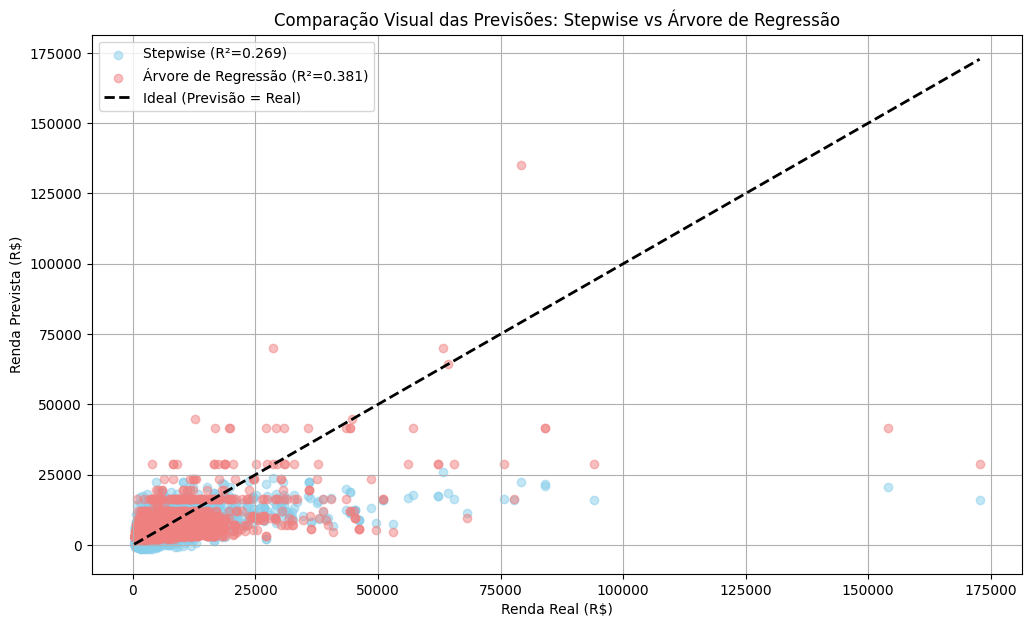

In [93]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Get predictions from the best Stepwise model
# We need to retrain the Stepwise model on the full transformed training data with selected features
# Certifique-se de que best_sfs, pre_no_drop, X_train, y_train, X_test, y_test, feat_names estão definidos
mask = best_sfs['mask']
lr_stepwise = LinearRegression().fit(
    pre_no_drop.transform(X_train)[:, mask],
    y_train
)
y_pred_stepwise = lr_stepwise.predict(pre_no_drop.transform(X_test)[:, mask])


# We already have y_pred_tree from the Decision Tree model
# Certifique-se de que y_pred_tree está definido

# Visualize the predictions of both models vs actual values
plt.figure(figsize=(12, 7))

# Scatter plot for Stepwise predictions
plt.scatter(y_test, y_pred_stepwise, alpha=0.5, label=f'Stepwise (R²={r2_stepwise:.3f})', color='skyblue')

# Scatter plot for Decision Tree predictions
# Certifique-se de que r2_tree está definido
plt.scatter(y_test, y_pred_tree, alpha=0.5, label=f'Árvore de Regressão (R²={r2_tree:.3f})', color='lightcoral')

# Add a reference line where predictions equal actual values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal (Previsão = Real)')

plt.xlabel("Renda Real (R$)")
plt.ylabel("Renda Prevista (R$)")
plt.title("Comparação Visual das Previsões: Stepwise vs Árvore de Regressão")
plt.legend()
plt.grid(True)
plt.show()

**Conclusão:**

A Árvore de Regressão apresentou o melhor desempenho preditivo (maior R² no conjunto de teste), indicando que as relações entre as variáveis e a renda são não lineares e envolvem interações complexas que os modelos lineares não captaram adequadamente.

Embora os modelos lineares ofereçam maior interpretabilidade, a árvore compensou essa limitação com poder preditivo superior.